### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [40]:
# IMPORT LIBRARY
library(dplyr)
library(ggplot2)
library(lubridate) # EXTRACT DAY AND MONTH FROM DATE

In [41]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [42]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [43]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [44]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [45]:
# DATA WRANGLING
# CONCATENATE ALL 3 CITIES' DATASETS
# CREATE NULL COLUMNS OF 'Gender' AND 'Birth.Year' IN THE WASHINGTON DATASET
wash$Gender<-NA
wash$Birth.Year<-NA

In [46]:
# ADD A NEW COLUMN 'City' TO EACH DATASET TO RETAIN CITY INFO
chi$City <- 'CHI'
ny$City <- 'NYC'
wash$City <- 'WASH'

In [47]:
# CONCATENATE 3 DATASETS AS 'NWC'
NWC <- rbind(ny,wash,chi)

In [48]:
head(NWC)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,NYC
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,NYC
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,NYC
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,NYC
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,NYC
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,NYC


In [7]:
str(NWC)

'data.frame':	152451 obs. of  10 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 143945 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 143948 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: num  795 692 1325 703 329 ...
 $ Start.Station: Factor w/ 1585 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 1586 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...
 $ City         : chr  "NYC" "NYC" "NYC" "NYC" ...


### Question 1


What're the counts of each gender in Chicago?

In [49]:
# COUNT OF GENDER 
count_of_user = sort(table(chi$Gender))
print(count_of_user)

# PERCENTAGE OF GENDER
round((count_of_user / length(chi$Gender) * 100), digits = 2)


Female          Male 
  1723   1748   5159 



Female          Male 
 19.97  20.25  59.78 

In [50]:
# INSPECT FOR ANY ERROR ROWS
error_row <- which(is.na(chi$Gender))
print(chi[error_row,])

 [1] X             Start.Time    End.Time      Trip.Duration Start.Station
 [6] End.Station   User.Type     Gender        Birth.Year    City         
<0 rows> (or 0-length row.names)


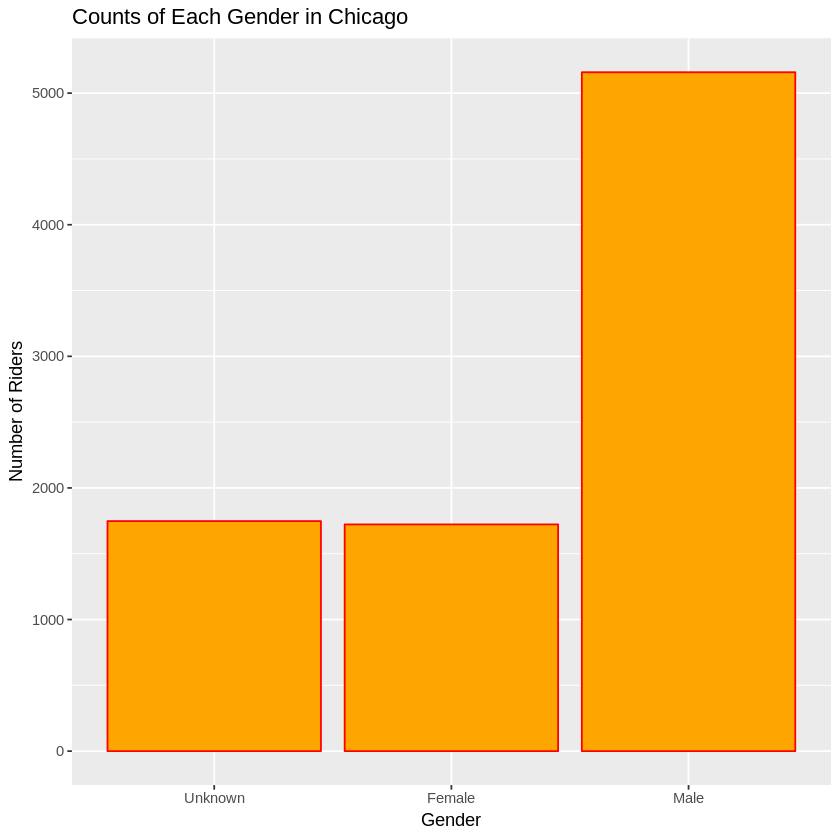

In [51]:
# DATA VISUALIZATION WITH ggplot
ggplot(aes(x = Gender, fill = Gender), data = chi) +
    ggtitle('Counts of Each Gender in Chicago') +
    scale_x_discrete(labels = c('Unknown', 'Female', 'Male')) +
    xlab('Gender') +
    ylab('Number of Riders') +
    geom_bar(position = 'dodge', colour='red', fill = 'orange') 

**Summary of your question 1 results goes here.** 

1.Among all users in Chicago, there are 5159 of Male(59.78%), 1748 of Unknown(20.25%) and 1723 of Female(19.97%).
2.Males (5159) tend to rent more bikes than Females (1723) do.                 
3.For some reasons, 20.25% of riders haven't disclose their gender.

### Question 2

What're user types and ways to use the bikeshare service in New York?

In [52]:
# COUNT THE NUMBER OF USERS OF EACH TYPE
ny_type_counts <- ny %>%
    group_by(User.Type) %>%
    count()
print(ny_type_counts)

# A tibble: 3 x 2
# Groups:   User.Type [3]
  User.Type      n
  <fct>      <int>
1 ""           119
2 Customer    5558
3 Subscriber 49093


In [53]:
# PERCENTAGE OF EACH TYPE
round((type_counts / length(ny$User.Type) * 100), digits = 2)


             Customer Subscriber 
      0.22      10.15      89.63 

In [54]:
# INSPECT FOR ANY ERROR ROWS
error_row <- which(is.na(ny$User.Type))
print(ny[error_row,])

 [1] X             Start.Time    End.Time      Trip.Duration Start.Station
 [6] End.Station   User.Type     Gender        Birth.Year    City         
<0 rows> (or 0-length row.names)


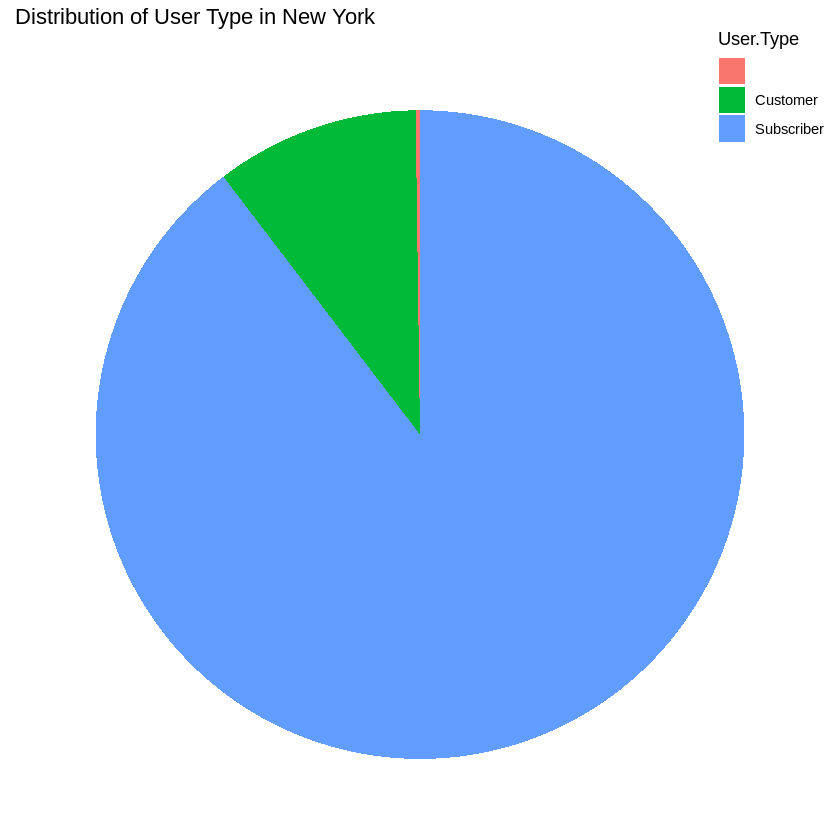

In [55]:
# DATA VISUALIZATION 
ggplot(aes(x = '', y = n, fill = User.Type), data = ny_type_counts) +
    geom_bar(width = 1, stat = 'identity') +
    coord_polar(theta = 'y') + 
    ggtitle('Distribution of User Type in New York') +
    theme_void() +
    theme(legend.position = c(1, 1), legend.justification = c('right' , 'top')) 

In [56]:
# CREATE NEW COLUMN FOR THE INITIATE HOUR OF EACH TRIP 
ny$Hour <- lubridate::hour(ny$Start.Time)
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Hour
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,NYC,14
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,NYC,15
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,NYC,13
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,NYC,19
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,NYC,7
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,NYC,18


In [57]:
# CALCULATE TOTAL TRIPS BY HOUR AND USER TYPE
  hourly_trips <- ny %>%
    group_by(Hour, User.Type) %>%
    summarize(Trips = n(), .groups = 'time')
  print(hourly_trips)

# A tibble: 66 x 4
# Groups:   Hour [?]
    Hour User.Type  Trips .groups
   <int> <fct>      <int> <chr>  
 1     0 ""             2 time   
 2     0 Customer      40 time   
 3     0 Subscriber   394 time   
 4     1 Customer      24 time   
 5     1 Subscriber   207 time   
 6     2 ""             1 time   
 7     2 Customer      19 time   
 8     2 Subscriber   132 time   
 9     3 Customer       9 time   
10     3 Subscriber    51 time   
# … with 56 more rows


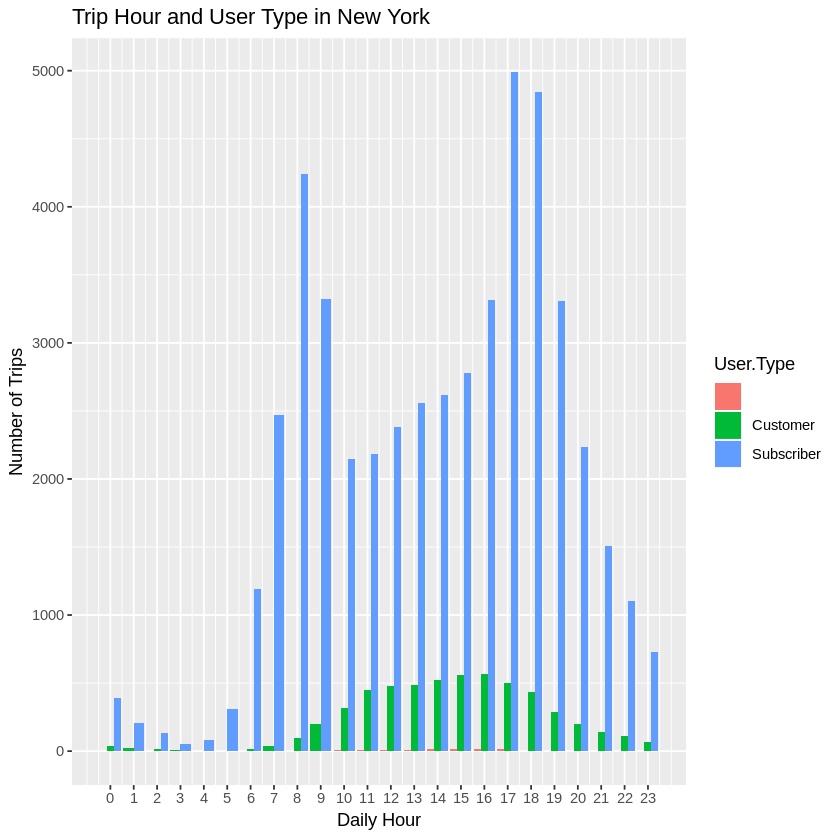

In [58]:
# DATA VISUALIZATION
ggplot(hourly_trips, aes(x = Hour, y = Trips, fill = User.Type)) +
    geom_bar(position = 'dodge', stat = 'identity') +
    xlab('Daily Hour') +
    ylab('Number of Trips') + 
    ggtitle('Trip Hour and User Type in New York') +
    scale_x_continuous(breaks = seq(0,23,1))

**Summary of your question 2 results goes here.**                                          
1.Users in New York city are mainly Subcribers and Customers. The number of Subcribers is 49093, which takes 89.63% of all. Meanwhile, Customers are 5558 and take 10.15%. Unknowns are very few, only 119 and take 0.22%.                                                        
2.Subcriber's using bikeshare service peaks during rush hours. The service peaks at 8 and 9, which shows that most people go to work at that time. The service slows down and peaks again at 17 and 18 when people leaves work.                                                      
3.The peak of customers' use is relatively late. Customers tend to use the service more frequently in the afternoon.                                                                
4.The result also shows a probabilty that subcribers use bikeshare service for business affairs during day time. In order to conclude the theory, more research needs to be done.     
5.For some reasons, 0.22% of riders haven't disclosed their type.

### Question 3

What's the average amount of trip duration for users in each city?

In [59]:
# CONVERT TRIP DURATION FROM SECONDS TO MINUTES
NWC$Trip.Duration <- NWC$Trip.Duration/60

In [60]:
summary(NWC$Trip.Duration)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.000     6.533    11.117    18.308    19.312 18143.900         2 

In [61]:
# INSPECT FOR ANY ERROR ROWS
error_row <- which(is.na(NWC$Trip.Duration))
print(NWC[error_row,])

             X          Start.Time End.Time Trip.Duration Start.Station
54770  6078570 2017-06-18 16:20:21      201            NA              
143821     132                                         NA              
       End.Station User.Type Gender Birth.Year City
54770                                       NA  NYC
143821                         <NA>         NA WASH


In [62]:
# REMOVE ERROR ROWS
na_rows <- c(54770, 143821)
NWC <- NWC[-na_rows, ]

In [63]:
summary(NWC$Trip.Duration)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.000     6.533    11.117    18.308    19.312 18143.900 

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 9 rows containing non-finite values (stat_bindot).”

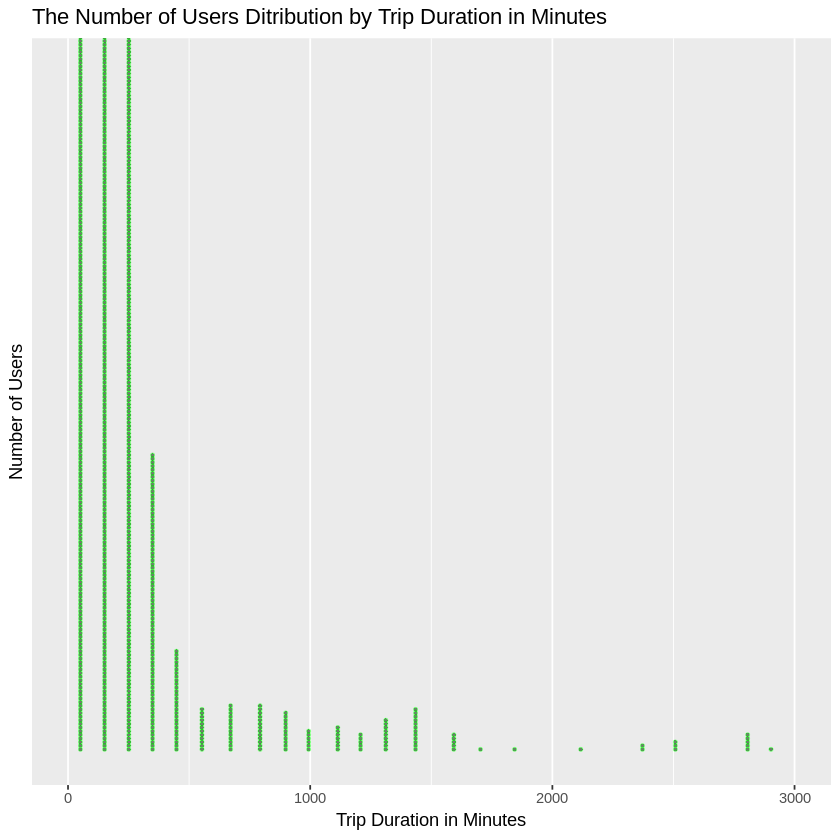

In [64]:
# CREATE A DOTPLOT OF TRIP.DURATION WITH OUTLIERS REMOVED
ggplot(aes(x=Trip.Duration), data = NWC) +
    geom_dotplot(dotsize = 0.15, color = "#00FF00", alpha = .5) +
    scale_x_continuous(labels = scales::comma, breaks = seq(0,3000,100))+
    scale_y_continuous(breaks = NULL) +
    xlim(0,3000) +
    ggtitle('The Number of Users Ditribution by Trip Duration in Minutes') +
    xlab('Trip Duration in Minutes') +
    ylab('Number of Users')

In [65]:
by(NWC$Trip.Duration, NWC$City, summary)

NWC$City: CHI
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    6.571   11.167   15.620   18.650 1423.467 
------------------------------------------------------------ 
NWC$City: NYC
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.017     6.133    10.167    15.060    17.517 18143.900 
------------------------------------------------------------ 
NWC$City: WASH
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.005     6.848    11.783    20.566    20.554 15076.523 

In [66]:
# INSPECT THE PRAMARY PERCENTILE OF TRIP DURATION DISTRIBUTION
quantile(NWC$Trip.Duration, 0.75)

75% 
19.31203

In [67]:
quantile(NWC$Trip.Duration, 0.99)

99% 
121.8425

Warning message:
“Removed 1585 rows containing non-finite values (stat_boxplot).”

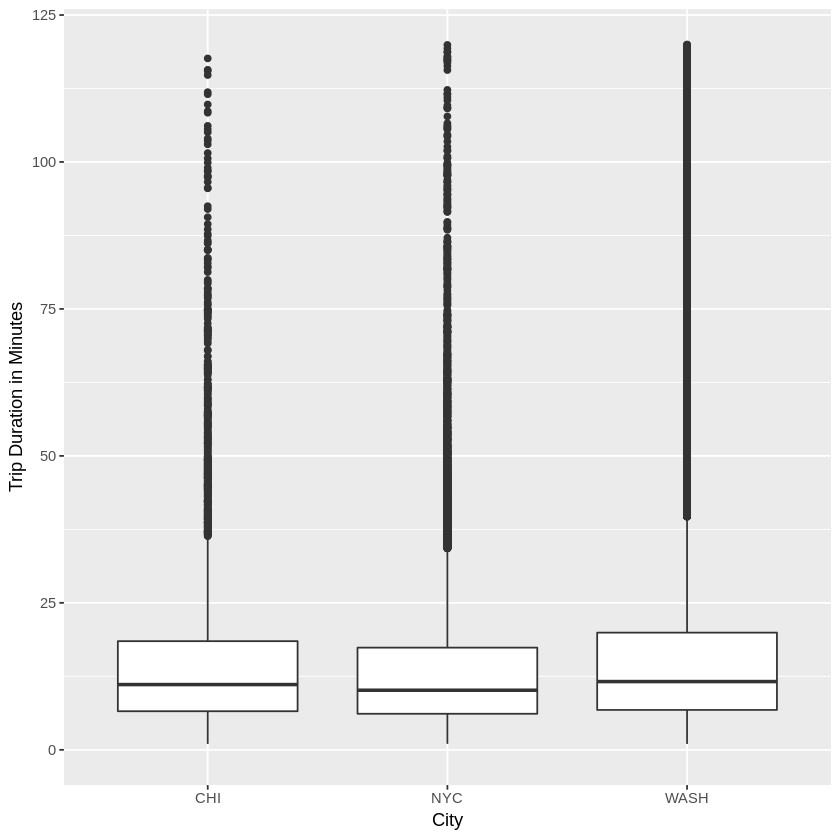

In [68]:
# 
# CREATE BOXPLOT OF TRIP DURATION WITH TOP 1% REMOVED
ggplot(aes(x = City, y = Trip.Duration),data = NWC) +
    geom_boxplot() +
    ylim(0,120) +
    labs('The Distribution of Trip Duration in Each City')+
    xlab('City') +
    ylab('Trip Duration in Minutes')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1585 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

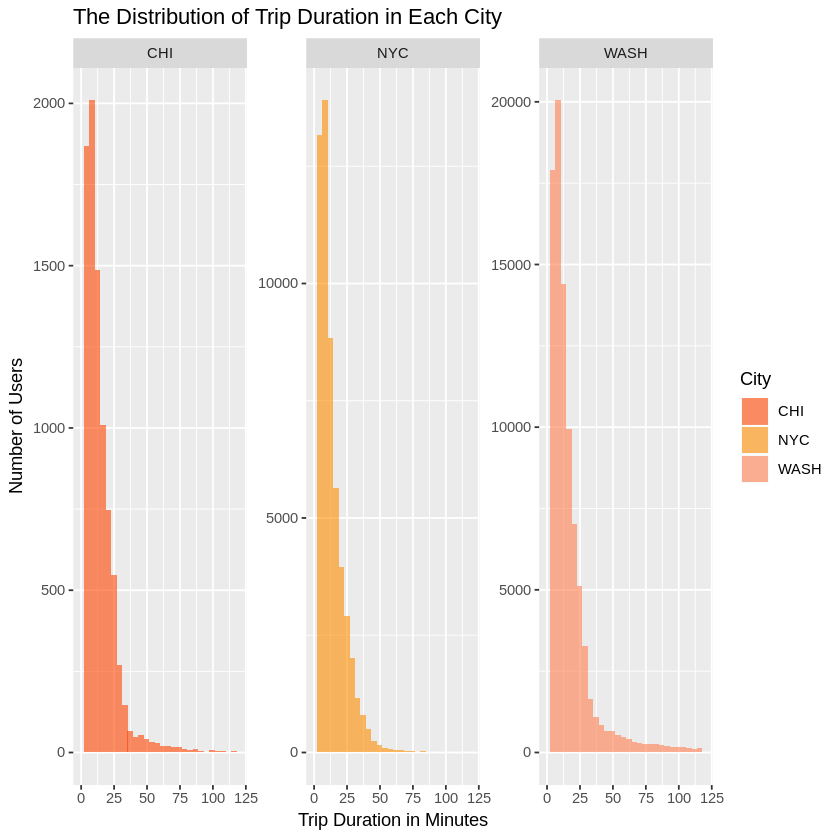

In [69]:
# Create Histogram of Trip Duration with top 1% removed
ggplot(aes(x = Trip.Duration, fill=City), data = NWC) +
    geom_histogram() +
    xlim(0,120) +
    facet_wrap(~City,scales = 'free') +
    scale_fill_manual(values=alpha(c('#FF4500','#FF8C00','#FF7F50'), 0.6)) +
    ggtitle('The Distribution of Trip Duration in Each City') +
    xlab('Trip Duration in Minutes') +
    ylab('Number of Users')  

**Summary of your question 3 results goes here.**                                             
1.The majority of trip durations of users in all 3 cities is within 1000 minutes, specifically, 99% trip durations stay under 122 minutes and 75% stay under 20 minutes.        2.All three cities seem to have similar dot distributions in trip duration. Meanwhile, Washington's distribution is slightly denser.                                                
3.D.C. and Chicago have a bit higher percentage of users traveling longer than 50 minutes compared to New York. Whether it is because of longer cycling distance, worse traffic conditions, or other reasons, needs further research.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [70]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')